# Principal Component Analysis (PCA)

In this lab we will move to considering unsupervised learning, and in particulat the problem of dimensionality reduction.

As usual, we start importing libraries and functions already used in one of the previous labs.

In [1]:
# import libraries
%matplotlib inline
# Garbarino Giacomo s4545532
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy.linalg as la

In [2]:
def mixGauss(means, sigmas, n):

    means = np.array(means)
    sigmas = np.array(sigmas)

    d = means.shape[1]
    num_classes = sigmas.size
    data = np.full((n * num_classes, d), np.inf)
    labels = np.zeros(n * num_classes)

    for idx, sigma in enumerate(sigmas):
        data[idx * n:(idx + 1) * n] = np.random.multivariate_normal(mean=means[idx], cov=np.eye(d) * sigmas[idx] ** 2,
                                                                    size=n)
        labels[idx * n:(idx + 1) * n] = idx 
        
    if(num_classes == 2):
        labels[labels==0] = -1

    return data, labels

##### Data generation

To generate a synthetic dataset suitable for use with PCA, we first generate a subset of "relevant" features, and then concatenate with a second set of "dummy" featuers. To this purpose,  we proceed as follows:
- Generate a dataset with mixGauss using two Gaussians "close" with each other (see example below). Let's start considering 2-Dimensional points 
- Plot the points: you should observe an "elongated" points cloud
- Enrich the input samples with "dummy" variables randomly sampled and concatenate to the relevant features (notice that at this point data visualization is no more possible


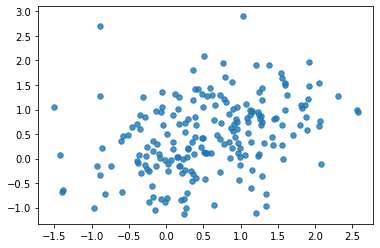

In [3]:
n=100 # number of features for each gaussian
d=30 # total number of features
d_rev = 2 # number of relevant features

Xtr, Ytr = mixGauss(means = [[0,0],[1,1]], sigmas = [0.7, 0.7], n=100)
Ytr[Ytr==2]=-1

# plot
plt.scatter(Xtr[:,0], Xtr[:,1], s=30, alpha=0.80)

# dummy features generation
sigma_noise = 0.01
Xtr_noise = sigma_noise * np.random.randn(d_rev*n, d-d_rev)
Xtr = np.concatenate((Xtr,Xtr_noise), axis=1)


### Principal Component Analysis

##### explainedVariance
Given a set of eigenvalues, sorted in decreasing order, the function returns the cumulative explained variance 

In [4]:
def explainedVariance(eig_vals):
    
    tot = sum(eig_vals)
    var_exp = [(i / tot)*100 for i in eig_vals]
    cum_var_exp = np.cumsum(var_exp)
    
    return cum_var_exp

##### PCA

Given a data matrix and a positive number k, the function computes the first k eigenvectors of the covariance matrix. It returns the Principal Components and the Cumulative Explained Variance.

In [5]:
def PCA(X, k):
   
    # standardize the data
    mean = X.mean(axis=0)
    X_z = X - mean
    
    # Compute the covariance matrix of X_z
    cov_mat = X_z.T.dot(X_z) # ... fill here ...
    
    # compute eigenvalues and eigenvectors of the covariance matrix
    eigvals, eigvec = np.linalg.eig(cov_mat)
    
    # sort the eigenvalues in decreasing order and obtain the corresponding indexes
    Iv = np.argsort(eigvals)
    Iv = Iv[::-1]
    
    # select the first k eigenvectors (Principal Components)
    PC = eigvec[:,Iv[:k]]
   
    print(np.shape(PC))
    
    # compute the Cumulative Explained Variance
    expl_var = explainedVariance(eigvals[Iv])
    
    print(np.shape(PC))
    
    return PC, expl_var

##### PCA_Project

Given a matrix and the Principal Components, it returns the projected points

In [6]:
def PCA_Project(X, PC):

    # standardize the data
    mean = X.mean(axis=0)
    X_z = X - mean
    
    # obtain the projected points
    # ... fill here ...
    X_proj = X_z.dot(PC)
    
    return X_proj

#### Some analysis

We suggest to do the following:
- Run PCA on the training set
- Project the points
- Plot the Cumulative Explained Variance: what can you notice?
- Plot the projected points: how do they look?

Next, try the previous step as you
- Increase the standard deviation (sigma_noise) when you generate dummy features
- Increase the number of relevant features



(30, 2)
(30, 2)


Text(0, 0.5, 'Cumulative explained variance')

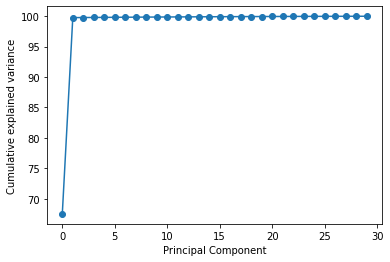

In [7]:
PC, expl_var = PCA(Xtr, 2) 
X_proj = PCA_Project(Xtr, PC) 
pcidx = np.arange(len(expl_var))

plt.plot(pcidx, expl_var, '-o')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative explained variance')


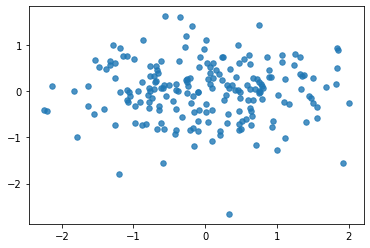

In [8]:
plt.scatter(X_proj[:,0], X_proj[:,1], s=30, alpha=0.80)